In [ ]:
import numpy as np
import pandas as pd
from keras import layers,models
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [ ]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print('Num Gpu Available',len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num Gpu Available 1


In [ ]:
import os

In [ ]:
from google.colab import files
kaggle=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
os.makedirs('/root/.kaggle',exist_ok=True)
os.rename('kaggle.json','/root/.kaggle/kaggle.json')

In [ ]:
!pip install kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:06<00:00, 134MB/s]
100% 812M/812M [00:07<00:00, 121MB/s]


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import zipfile
zip_file = 'dogs-vs-cats.zip'
extract_dir = 'dogs-vs-cats'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
extracted_files = os.listdir(extract_dir)
print(extracted_files)  # Check for test.csv in the list

['sampleSubmission.csv', 'test1.zip', 'train.zip']


In [ ]:
from zipfile import ZipFile
train_data='train_data'
zip_file = os.path.join(extract_dir, 'train.zip')
with ZipFile(zip_file, 'r') as file:
    file.extractall(train_data)

In [ ]:
test_data='test_data'
zip_file=os.path.join(extract_dir,'test1.zip')
with ZipFile(zip_file,'r') as zip_ref:
  zip_ref.extractall(test_data)

In [ ]:
files=os.listdir('train_data')
print(files)

['train']


In [ ]:
files=os.listdir('test_data')
print(files)

['test1']


In [ ]:
test_data_files=os.path.join(test_data,'test1')
print(os.path.exists(test_data_files))

True


In [ ]:
print(os.listdir(test_data_files)[:10])

['8195.jpg', '2905.jpg', '8317.jpg', '8979.jpg', '1818.jpg', '1613.jpg', '12434.jpg', '8765.jpg', '10130.jpg', '9541.jpg']


In [ ]:
data_train_kaggle=os.path.join(train_data,'train')
print(data_train_kaggle)

train_data/train


In [ ]:
print(os.getcwd())

/content


In [ ]:
my_path=os.path.join(os.getcwd(),'imageclassification')

In [ ]:
my_data=os.makedirs('imageclassification',exist_ok=True)

In [ ]:
train_path=os.path.join(my_path,'train_data')
test_path=os.path.join(my_path,'test_data')
validate_path=os.path.join(my_path,'validate_data')

In [ ]:
os.makedirs(train_path,exist_ok=True)
os.makedirs(test_path,exist_ok=True)
os.makedirs(validate_path,exist_ok=True)

In [ ]:
train_path_dog=os.path.join(train_path,'dog')
train_path_cat=os.path.join(train_path,'cat')
test_path_dog=os.path.join(test_path,'dog')
test_path_cat=os.path.join(test_path,'cat')
validate_path_cat=os.path.join(validate_path,'cat')
validate_path_dog=os.path.join(validate_path,'dog')

In [ ]:
os.makedirs(train_path_dog,exist_ok=True)
os.makedirs(train_path_cat,exist_ok=True)
os.makedirs(test_path_dog,exist_ok=True)
os.makedirs(test_path_cat,exist_ok=True)
os.makedirs(validate_path_cat,exist_ok=True)
os.makedirs(validate_path_dog,exist_ok=True)

In [ ]:
list_cat=['cat.{}.jpg'.format(i) for i in range(8752)]
list_valcat=['cat.{}.jpg'.format(i) for i in range(8752,12499)]

In [ ]:
list_dog=['dog.{}.jpg'.format(i) for i  in  range(8752)]
list_valdog=['dog.{}.jpg'.format(i) for i in range(8752,12499)]
train_listcat=set(os.listdir(train_path_cat))#for removing duplicates and reduce time complexity
train_listdog=set(os.listdir(train_path_dog))#for removing duplicates and reduce time complexity

validate_listcat=set(os.listdir(validate_path_cat))#for removing duplicates and reduce time complexity
validate_listdog=set(os.listdir(validate_path_dog))#for removing duplicates and reduce time complexity

In [ ]:
import shutil

In [ ]:
for  i in list_cat:
     if  i not in train_listcat:
       src=os.path.join(data_train_kaggle,i)
       dst=os.path.join(train_path_cat,i)
       shutil.copy(src,dst)
for  i in list_valcat:
     if  i not in validate_listcat:
       src=os.path.join(data_train_kaggle,i)
       dst=os.path.join(validate_path_cat,i)
       shutil.copy(src,dst)

for  i in list_dog:
     if  i not in train_listdog:
       src=os.path.join(data_train_kaggle,i)
       dst=os.path.join(train_path_dog,i)
       shutil.copy(src,dst)

for  i in list_valdog:
     if  i not in validate_listdog:
       src=os.path.join(data_train_kaggle,i)
       dst=os.path.join(validate_path_dog,i)
       shutil.copy(src,dst)

In [ ]:
print(len(train_listcat))
print(len(train_listdog))
print(len(validate_listcat))
print(len(validate_listdog))

0
0
0
0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                 rotation_range=40,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='reflect')
validate_datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='reflect')


In [ ]:
train_generator=train_datagen.flow_from_directory(train_path,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='binary',
                                                  shuffle=True)

Found 17504 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
validate_generator=validate_datagen.flow_from_directory(
    validate_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

Found 7494 images belonging to 2 classes.


In [ ]:
!pip uninstall gensim
!pip install gensim==4.3.0

Found existing installation: gensim 4.3.0
Uninstalling gensim-4.3.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/gensim-4.3.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/gensim/*
Proceed (Y/n)? ERROR: Operation cancelled by user


In [ ]:
img,labels=next(train_generator)

In [ ]:
def plotImage(imagearr):
  fig,axes=plt.subplots(1,10,figsize=(20,19))
  axes=axes.flatten()
  for img,ax in zip(imagearr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


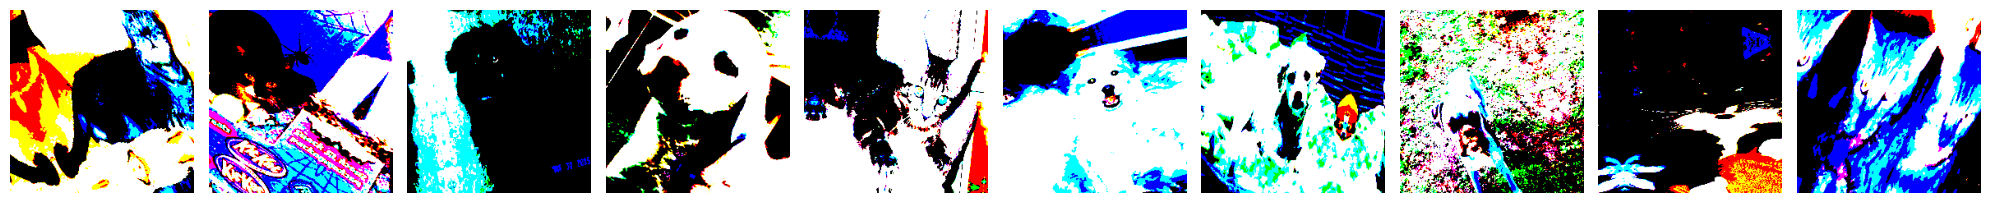

In [ ]:
plotImage(img)

In [ ]:
print(labels)

[0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 1.]


In [ ]:
network=models.Sequential()
network.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(244,244,3)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(256,(3,3),padding='same',activation='relu'))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(512,activation='relu'))
network.add(layers.Dropout(0.3))
network.add(layers.Dense(356,activation='relu'))
network.add(layers.Dense(215,activation='relu'))
network.add(layers.Dense(128,activation='relu'))
network.add(layers.Dense(64,activation='relu'))
network.add(layers.Dense(32,activation='relu'))
network.add(layers.Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 244, 244, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 122, 122, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 122, 122, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 356)                 │         182,628 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 215)                 │          76,755 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          27,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,293,368 (27.82 MB)

 Trainable params: 7,293,368 (27.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam=Adam(learning_rate=0.0001)
network.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics=['acc']

)

In [ ]:
history=network.fit(
    x=train_generator,
    validation_data=validate_generator,
    steps_per_epoch=875,
    epochs=30,
    validation_steps=100,
    verbose=2
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


875/875 - 298s - 340ms/step - acc: 0.5810 - loss: 0.6727 - val_acc: 0.6450 - val_loss: 0.6202
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


875/875 - 24s - 27ms/step - acc: 0.7000 - loss: 0.6020 - val_acc: 0.6445 - val_loss: 0.6261
Epoch 3/30
875/875 - 309s - 353ms/step - acc: 0.6707 - loss: 0.6043 - val_acc: 0.7040 - val_loss: 0.5733
Epoch 4/30
875/875 - 22s - 25ms/step - acc: 0.8500 - loss: 0.5056 - val_acc: 0.6988 - val_loss: 0.5621
Epoch 5/30
875/875 - 336s - 384ms/step - acc: 0.7202 - loss: 0.5542 - val_acc: 0.7290 - val_loss: 0.5286
Epoch 6/30
875/875 - 30s - 34ms/step - acc: 0.6500 - loss: 0.5427 - val_acc: 0.7110 - val_loss: 0.5453
Epoch 7/30
875/875 - 325s - 372ms/step - acc: 0.7402 - loss: 0.5176 - val_acc: 0.7745 - val_loss: 0.5075
Epoch 8/30
875/875 - 21s - 24ms/step - acc: 0.8000 - loss: 0.5189 - val_acc: 0.7490 - val_loss: 0.5202
Epoch 9/30
875/875 - 257s - 293ms/step - acc: 0.7623 - loss: 0.4900 - val_acc: 0.7720 - val_loss: 0.4611
Epoch 10/30
875/875 - 24s - 27ms/step - acc: 0.9000 - loss: 0.3480 - val_acc: 0.7830 - val_loss: 0.4645
Epoch 11/30
875/875 - 242s - 276ms/step - acc: 0.7871 - loss: 0.4558 - val_

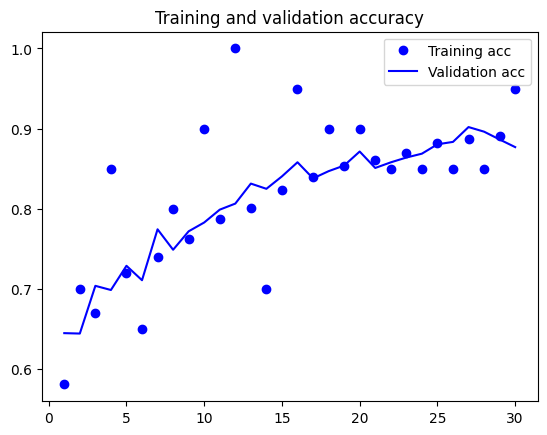

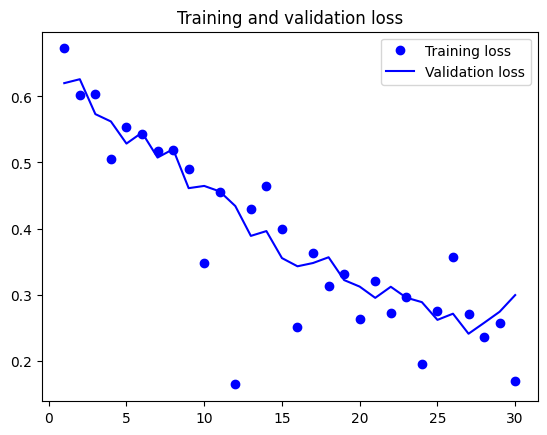

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model=network.save('my_cnn_model.h5')

In [ ]:
network.load_model('my_cnn_model.h5')

AttributeError: 'Sequential' object has no attribute 'load_model'

In [ ]:
from keras.applications import VGG16

In [ ]:
convet=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
convet.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for layers_c in convet.layers:
  layers_c.trainable=False

In [ ]:
from keras import layers
network2=models.Sequential()
network2.add(convet)
network2.add(layers.Flatten())
network2.add(layers.Dropout(0.3))
network2.add(layers.Dense(256,activation='relu'))
network2.add(layers.BatchNormalization())
network2.add(layers.Dense(128,activation='relu'))
network2.add(layers.BatchNormalization())
network2.add(layers.Dense(64,activation='relu'))
network2.add(layers.BatchNormalization())
network2.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
adam=Adam(learning_rate=0.001)
network2.compile(
    loss='binary_crossentropy',
    optimizer=adam,
    metrics=['acc']
)

In [ ]:
history2=network2.fit(
    train_generator,
    epochs=10,
    validation_data=validate_generator,
    validation_steps=100,
    verbose=2
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


547/547 - 306s - 559ms/step - acc: 0.9416 - loss: 0.1436 - val_acc: 0.9700 - val_loss: 0.0777
Epoch 2/10
547/547 - 269s - 492ms/step - acc: 0.9594 - loss: 0.1018 - val_acc: 0.9666 - val_loss: 0.0780
Epoch 3/10
547/547 - 249s - 455ms/step - acc: 0.9669 - loss: 0.0891 - val_acc: 0.9808 - val_loss: 0.0615
Epoch 4/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


547/547 - 270s - 494ms/step - acc: 0.9703 - loss: 0.0824 - val_acc: 0.9697 - val_loss: 0.0771
Epoch 5/10
547/547 - 266s - 487ms/step - acc: 0.9712 - loss: 0.0754 - val_acc: 0.9675 - val_loss: 0.0783
Epoch 6/10
547/547 - 292s - 535ms/step - acc: 0.9729 - loss: 0.0737 - val_acc: 0.9726 - val_loss: 0.0830
Epoch 7/10
547/547 - 265s - 485ms/step - acc: 0.9735 - loss: 0.0700 - val_acc: 0.9762 - val_loss: 0.0610
Epoch 8/10
547/547 - 321s - 587ms/step - acc: 0.9758 - loss: 0.0647 - val_acc: 0.9706 - val_loss: 0.0929
Epoch 9/10
547/547 - 267s - 489ms/step - acc: 0.9740 - loss: 0.0679 - val_acc: 0.9781 - val_loss: 0.0644
Epoch 10/10
547/547 - 319s - 583ms/step - acc: 0.9741 - loss: 0.0663 - val_acc: 0.9744 - val_loss: 0.0671


In [ ]:
acc_2=history2.history['acc']
val_acc_2=history2.history['val_acc']
loss_2=history2.history['loss']
val_loss_2=history2.history['val_loss']

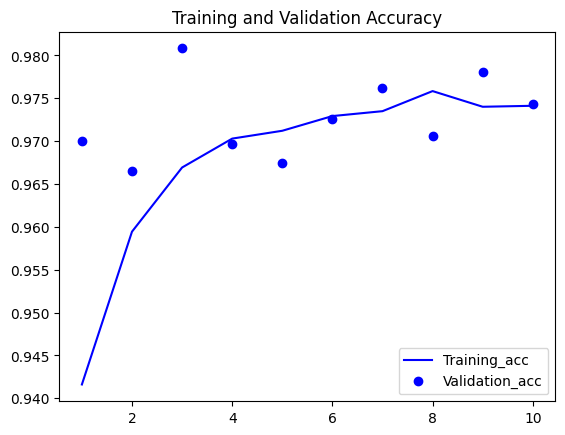

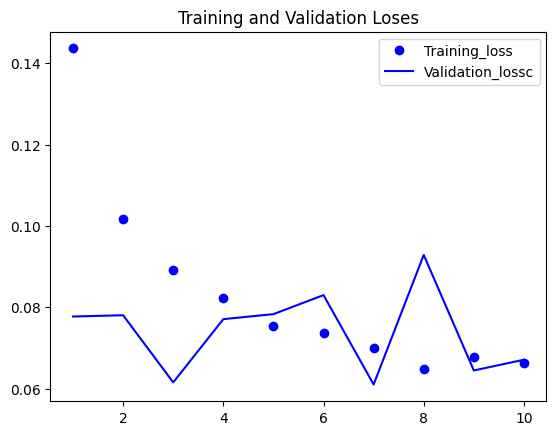

In [ ]:
epochs=range(1,len(acc_2)+1)
plt.plot(epochs,acc_2,'b',label='Training_acc')
plt.plot(epochs,val_acc_2,'bo',label='Validation_acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss_2,'bo',label='Training_loss')
plt.plot(epochs,val_loss_2,'b',label='Validation_lossc')
plt.title('Training and Validation Loses')
plt.legend()
plt.show()

In [ ]:
test_generator=ImageDataGenerator().flow_from_directory(
    test_data,
    target_size=(224,224),
    class_mode=None,
    batch_size=32
)


Found 12500 images belonging to 1 classes.


In [ ]:
predictions=network2.predict(test_generator,steps=len(test_generator))

391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 164ms/step


In [ ]:
predictions=(predictions>0.5).astype(int).flatten()

In [ ]:
print(predictions[:10])

[0 0 1 1 0 1 0 1 1 1]


In [ ]:
network2.save('cat_dog_finalPrediction.h5')